# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [10]:
%pip install pandas
%pip install SQLAlchemy==1.4.46
%pip install sqlite3
%pip install matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
                                              0.0/1.6 MB ? eta -:--:--
                                              0.0/1.6 MB ? eta -:--:--
     -                                        0.0/1.6 MB 991.0 kB/s eta 0:00:02
     -                                        0.1/1.6 MB 550.5 kB/s eta 0:00:03
     --                                       0.1/1.6 MB 512.0 kB/s eta 0:00:03
     --                                       0.1/1.6 MB 479.1 kB/s eta 0:00:04
     ---                                      0.1/1.6 MB 516.7 kB/s eta 0:00:03
     ---                                      0.1/1.6 MB 516.7 kB/s eta 0:00:03
     ----                                     0.2/1.6 MB 622.7 kB/s eta 0:00:03
     -----                                    0.2/1.6 MB 623.6 kB/s eta 0:00:03
     -----                                    0.2/1.6 MB 623.6 kB/s eta 0:00:03
     -----                                    0.2/1.6 MB 551.4 kB/s eta 

ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\magis\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~qlalchemy\\cyextension\\collections.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


## Load data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('data/database.db')


df1 = pd.read_sql_query("SELECT * FROM Gefahrenkontrollen", conn)
df2 = pd.read_sql_query("SELECT * FROM Gefahrgutzwischenfaelle", conn)

### Look at the first rows

In [16]:
df1.head(10)
df2.head(10)

,Year,Incidents/Accidents,Accidents with injuries to persons,administrative offense proceedings,Applications for exemptions,Permissions for overflight,Approvals for the transport of Dangerous Goods for German air carriers
0,2000,785,10,42,22,28,28
1,2001,719,7,36,12,23,59
2,2002,814,4,33,24,27,28
3,2003,1360,6,33,20,20,27
4,2004,1385,4,28,35,18,10
5,2005,1149,4,8,44,19,8
6,2006,5231,2,10,28,32,5
7,2007,11641,7,4,53,54,13
8,2008,20851,3,11,87,29,3
9,2009,37510,5,10,88,55,11


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Year                                 23 non-null     int64
 1   German air carriers                  23 non-null     int64
 2   Foreign air carriers                 23 non-null     int64
 3   Handling Agents                      23 non-null     int64
 4   German Airports and Aerodromes       23 non-null     int64
 5   Express Courier with own aeroplanes  23 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype
---  ------                                                                  --------------  -----
 0   Year                                       

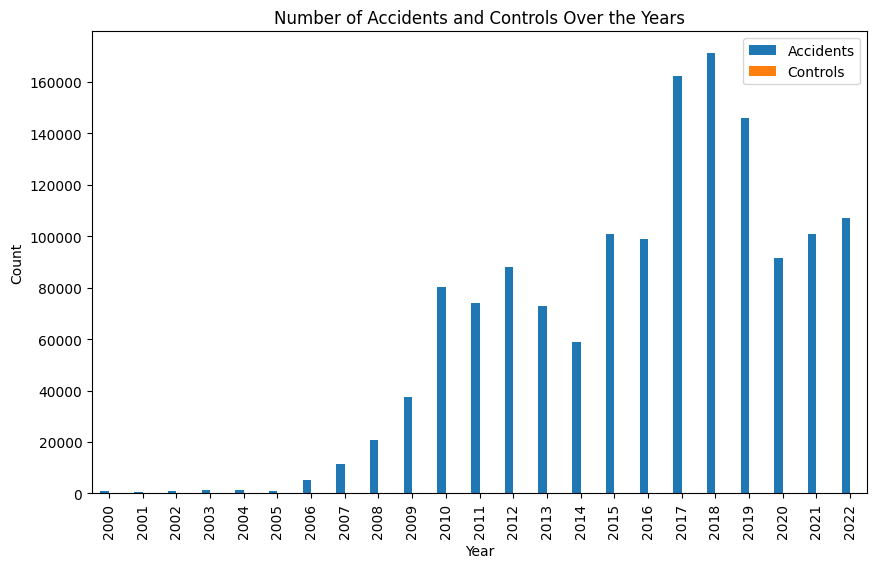

      Accidents  Controls
Year                     
2000        785         1
2001        719         1
2002        814         1
2003       1360         1
2004       1385         1
2005       1149         1
2006       5231         1
2007      11641         1
2008      20851         1
2009      37510         1
2010      80399         1
2011      74094         1
2012      88007         1
2013      73085         1
2014      58822         1
2015     100704         1
2016      98827         1
2017     162451         1
2018     171091         1
2019     146121         1
2020      91703         1
2021     100879         1
2022     106942         1


In [19]:
df1.info()
df2.info()

# Get the number of accidents per year
accidents_per_year = df2.groupby('Year')['Incidents/Accidents'].sum()

# Get the number of controls per year
controls_per_year = df1.groupby('Year').size()

# Combine the two series into a DataFrame
analysis_df = pd.DataFrame({'Accidents': accidents_per_year, 'Controls': controls_per_year})

# Plotting the number of accidents and controls over the years
analysis_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Accidents and Controls Over the Years')
plt.legend()
plt.show()

# Display the combined DataFrame
print(analysis_df)
